In [2]:
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation

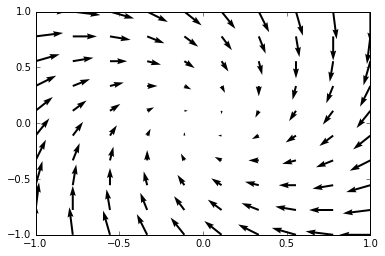

In [3]:
x, y = np.linspace(-1, 1, 10), np.linspace(-1, 1, 10)
x, y = np.meshgrid(x, y)
u = (-x + y)
v = -x - y

plt.quiver(x, y, u, v)

In [4]:

def init_weights(shape, std=None):
    if std is None:
        # he init
        std = np.sqrt(1. / shape[0])
    return tf.Variable(tf.random_normal(shape, stddev=std))

def init_weights_zero(shape):
    return tf.Variable(np.zeros(shape, dtype='float32'))


def build_model(X, nb_features=100, nb_hidden=50, act=tf.nn.sigmoid):
    bw = init_weights([nb_hidden])
    br = init_weights([nb_features])
    W = init_weights([nb_features, nb_hidden])
    R = tf.transpose(W)
    #R = init_weights([nb_hidden, nb_features])
    h = act(tf.matmul(X, W) + bw)
    Y = (tf.matmul(h, R) + br)
    return Y, (bw, br, W, R)

nb_features = 2
X = tf.placeholder("float", [None, nb_features])
Y = tf.placeholder("float" )
Ypred, weights = build_model(X, nb_features=nb_features, nb_hidden=500, act=tf.nn.relu)
cost = tf.reduce_mean(tf.pow(Ypred - Y, 2))
learning_rate = 0.01
train_op = tf.train.MomentumOptimizer(learning_rate, momentum=0.5).minimize(cost)

In [5]:
Xdata = np.vstack((x.flatten(), y.flatten())).T
Ydata = np.vstack((u.flatten(), v.flatten())).T + Xdata

In [79]:
sess = tf.Session()
with sess.as_default():
    tf.initialize_all_variables().run()
    for i in range(1000):
        sess.run(train_op, feed_dict={X: Xdata, Y: Ydata})
        loss = sess.run(cost, feed_dict={X: Xdata, Y: Ydata})
        if i % 100 == 0:
            print(loss)
    
    Ydata_pred = sess.run(Ypred, feed_dict={X: Xdata})

51.0442
0.422113
0.407555
0.407296
0.407256
0.407227
0.407193
0.407164
0.407141
0.407114


In [80]:
def vectorfieldat(p):
    with sess.as_default():
        return sess.run(Ypred - X, feed_dict={X: p})
def vectorfieldat_truth(p):
    x, y = p[:, 0], p[:, 1]
    u = (-x + y)
    v = -x - y
    return np.vstack((u, v)).T

In [88]:
pcoords_at = []
pcoords = np.random.uniform(-1, 1, size=(100, 2))
for i in range(300):
    pcoords += 0.01 * vectorfieldat_truth(pcoords)
    pcoords_at.append(pcoords.copy())

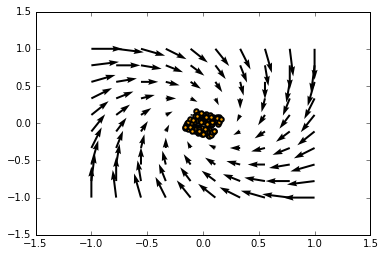

In [89]:
fig = plt.figure()
ax = plt.axes()
ax.quiver(Xdata[:, 0], Xdata[:, 1], (Ydata - Xdata)[:, 0], (Ydata - Xdata)[:, 1])
#ax.quiver(Xdata[:, 0], Xdata[:, 1], (Ydata_pred - Xdata)[:, 0], (Ydata_pred - Xdata)[:, 1])

sc = ax.scatter([pcoords_at[0]], [pcoords_at[1]], lw=2, c='orange')

# initialization function: plot the background of each frame
def init():
    #sc.set_array(pcoords_at[0])
    return sc,

# animation function.  This is called sequentially
def animate(i):
    sc.set_offsets(pcoords_at[i])
    return sc,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, 
                               animate, 
                               init_func=init,
                               frames=200, 
                               interval=1, 
                               blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30)

plt.show()